<a href="https://colab.research.google.com/github/ashwinram472/100-Days-Of-ML-Code/blob/master/Alg_Trading_3MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Three Moving Average Crossover Strategy to determine when to buy and sell stock 

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas_datareader import data

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
# Getting Data from Yahoo Finance
company = 'TSLA';
datasource = 'yahoo'
start = '2010-01-01'
end = '2020-06-01'
df = data.DataReader(company , datasource , start,end)

# Show the data
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


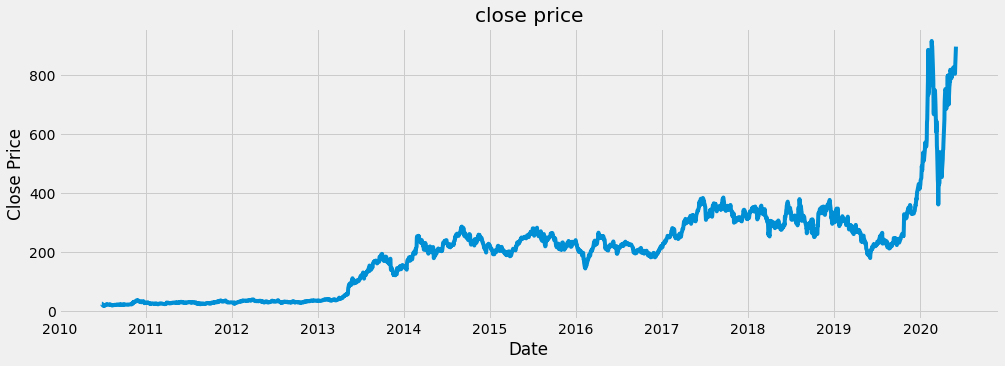

In [ ]:
#Visualize the data(Close)
plt.figure(figsize = (15,5))
plt.title('close price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
#Calculate the three moving Averages
# Short Moving Average : Exponential Moving Average
ShortEMA = df.Close.ewm(span = 5 , adjust = False).mean()

# Medium Exponential Moving Average
MiddleEMA = df.Close.ewm(span =  21 , adjust = False).mean()    # Should be betwen 5 and 61 

# Long Moving Average :
LongEMA = df.Close.ewm(span = 63, adjust = False).mean()


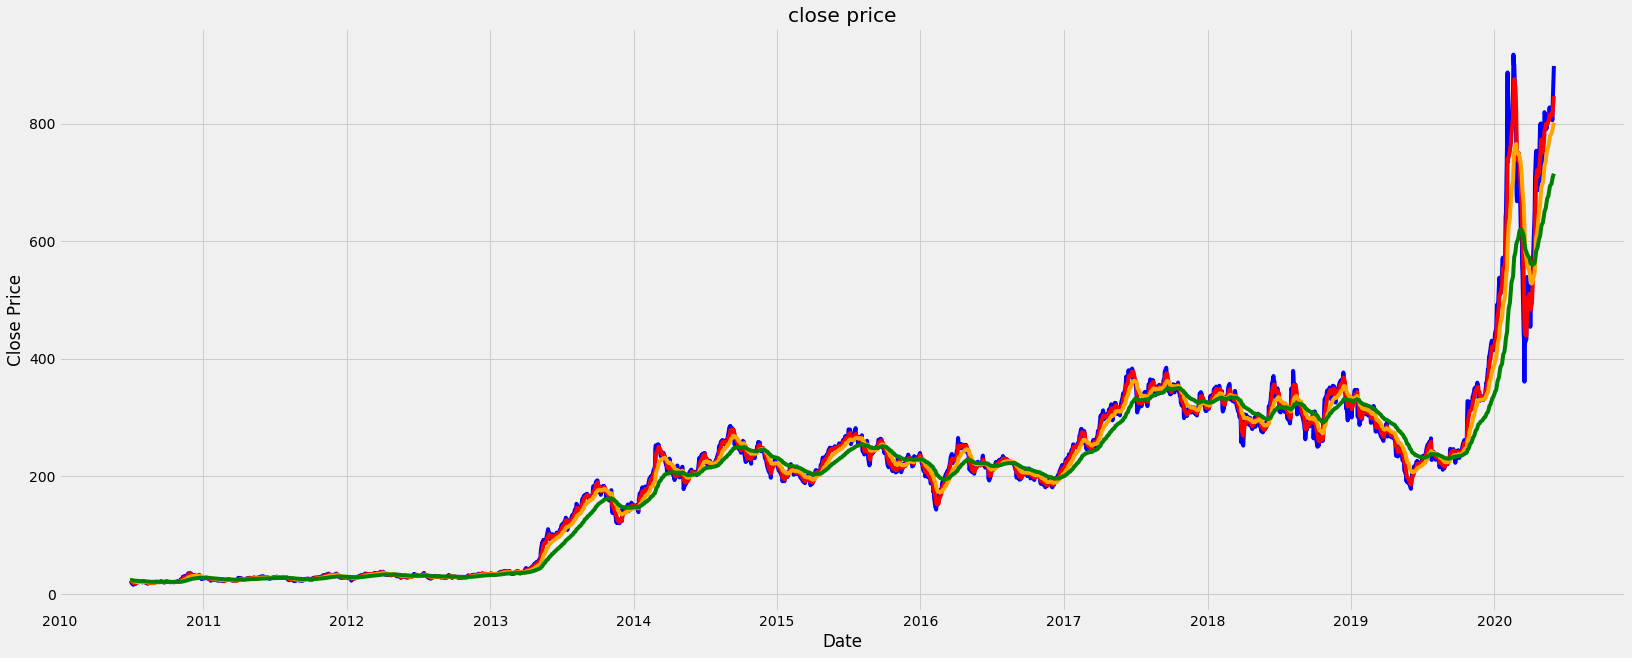

In [ ]:
# Plot Closing price and Expoenential Moving Average
plt.figure(figsize = (25,10))
plt.title('close price')
plt.plot(df['Close'], label = 'Close Price' , color = 'blue')
plt.plot(ShortEMA, label ='Short/Fast EMA' , color = 'red')
plt.plot(MiddleEMA, label = 'Middle/ Medium EMA' , color = 'orange')
plt.plot(LongEMA ,label = 'Long/Slow EMA' , color ='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
# Add exponential Moving Averages to dataset
df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = LongEMA

In [ ]:
# Look at the DF
df.head()

,High,Low,Open,Close,Volume,Adj Close,Short,Middle,Long
Date,,,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,23.889999,23.889999,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,23.870000,23.884545,23.888124
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,23.233333,23.709586,23.827870
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,21.888889,23.299624,23.683250
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,19.962593,22.646022,23.446586


In [ ]:
# Function to buy and sell stock
def buy_sell(data):

  sell_list = []
  buy_list = []
  flag_long = False
  flag_short = False
  
  for i in range(0 , len(data)):

    # Buying stock
    if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_short = True

    #Selling stock
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_short = False

    # Buying stock
    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_long = True

    #Selling stock
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    
    # If nothing matches
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
    
  return (buy_list , sell_list)
    

In [ ]:
# Add buy and sell to the dataset
df['Buy'] = buy_sell(df)[0]
df['Sell'] = buy_sell(df)[1]

In [ ]:
df['Buy'].isnull().sum()
df.shape

(2498, 11)

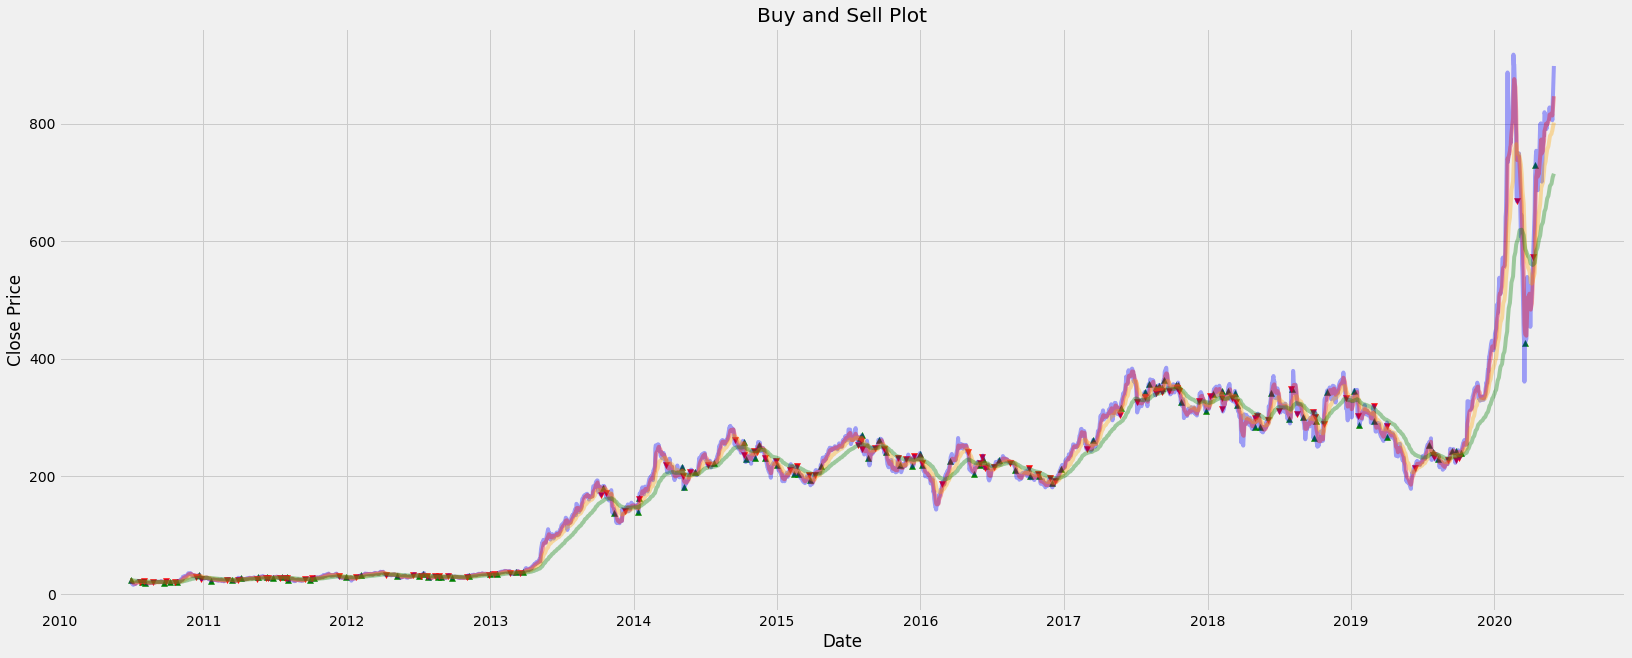

In [ ]:
# Visualize stock buy and sell signals
plt.figure(figsize = (25,10))
plt.title('Buy and Sell Plot')
plt.plot(df['Close'], label = 'Close Price' , color = 'blue' , alpha = 0.35)
plt.plot(ShortEMA, label ='Short/Fast EMA' , color = 'red' , alpha = 0.35)
plt.plot(MiddleEMA, label = 'Middle/ Medium EMA' , color = 'orange', alpha = 0.35)
plt.plot(LongEMA ,label = 'Long/Slow EMA' , color ='green', alpha = 0.35)
plt.scatter(df.index , df['Buy'], color = 'green' , marker = '^' , alpha = 1)   # Buy Signal
plt.scatter(df.index , df['Sell'], color = 'red' , marker = 'v' , alpha = 1)    # Sell Signal
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()